# Formula 1 Data Collection from ERGAST Web

First we're going to collect our data. For this lab we're pulling from ERGAST. We've gone ahead and collected the data in advance to save time during this lab. If you want to see how it was done and find code you can use in your own projects, check out the `from_scratch` folder.

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
import time
start = time.time()

In [41]:
import os
import pandas as pd
import numpy as np
from pprint import pprint
import requests

## F1 Races

In [42]:
races = pd.read_csv('./data/races.csv')

In [43]:
print(races.shape)

(1035, 8)


In [44]:
races.head()

,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


In [45]:
races.tail()

,season,round,circuit_id,lat,long,country,date,url
1030,2020,13,imola,44.3439,11.7167,Italy,2020-11-01,https://en.wikipedia.org/wiki/2020_Emilia_Roma...
1031,2020,14,istanbul,40.9517,29.4050,Turkey,2020-11-15,https://en.wikipedia.org/wiki/2020_Turkish_Gra...
1032,2020,15,bahrain,26.0325,50.5106,Bahrain,2020-11-29,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...
1033,2020,16,bahrain,26.0325,50.5106,Bahrain,2020-12-06,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...
1034,2020,17,yas_marina,24.4672,54.6031,UAE,2020-12-13,https://en.wikipedia.org/wiki/2020_Abu_Dhabi_G...


## F1 Rounds

In [46]:
rounds = []
for year in np.array(races.season.unique()):
    rounds.append([year, list(races[races.season == year]['round'])])

In [47]:
rounds[:5]

[[1950, [1, 2, 3, 4, 5, 6, 7]],
 [1951, [1, 2, 3, 4, 5, 6, 7, 8]],
 [1952, [1, 2, 3, 4, 5, 6, 7, 8]],
 [1953, [1, 2, 3, 4, 5, 6, 7, 8, 9]],
 [1954, [1, 2, 3, 4, 5, 6, 7, 8, 9]]]

## Formula 1  Races Results

In [48]:
results = pd.read_csv('./data/results.csv')

In [49]:
print(results.shape)

(24507, 13)


In [50]:
results.head()

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium,url
0,1950,1,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,1,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2,http://en.wikipedia.org/wiki/1950_British_Gran...
2,1950,1,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3,http://en.wikipedia.org/wiki/1950_British_Gran...
3,1950,1,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4,http://en.wikipedia.org/wiki/1950_British_Gran...
4,1950,1,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5,http://en.wikipedia.org/wiki/1950_British_Gran...


In [51]:
results.tail()

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium,url
24502,2020,17,yas_marina,giovinazzi,1993-12-14,Italian,alfa,14,NaN,+1 Lap,0.0,16,https://en.wikipedia.org/wiki/2020_Abu_Dhabi_G...
24503,2020,17,yas_marina,latifi,1995-06-29,Canadian,williams,18,NaN,+1 Lap,0.0,17,https://en.wikipedia.org/wiki/2020_Abu_Dhabi_G...
24504,2020,17,yas_marina,kevin_magnussen,1992-10-05,Danish,haas,20,NaN,+1 Lap,0.0,18,https://en.wikipedia.org/wiki/2020_Abu_Dhabi_G...
24505,2020,17,yas_marina,pietro_fittipaldi,1996-06-25,Brazilian,haas,17,NaN,+2 Laps,0.0,19,https://en.wikipedia.org/wiki/2020_Abu_Dhabi_G...
24506,2020,17,yas_marina,perez,1990-01-26,Mexican,racing_point,19,NaN,Transmission,0.0,20,https://en.wikipedia.org/wiki/2020_Abu_Dhabi_G...


## Formula 1 Driver Standings

In [52]:
driver_standings = pd.read_csv('./data/driver_standings.csv')

In [53]:
print(driver_standings.shape)

(26622, 9)


In [54]:
driver_standings.head()

,season,round,driver,driver_points_after_race,driver_wins_after_race,driver_standings_pos_after_race,driver_points,driver_wins,driver_standings_pos
0,1950,1,farina,9.0,1,1,0.0,0.0,0.0
1,1950,1,fagioli,6.0,0,2,0.0,0.0,0.0
2,1950,1,reg_parnell,4.0,0,3,0.0,0.0,0.0
3,1950,1,cabantous,3.0,0,4,0.0,0.0,0.0
4,1950,1,rosier,2.0,0,5,0.0,0.0,0.0


In [55]:
driver_standings.tail()

,season,round,driver,driver_points_after_race,driver_wins_after_race,driver_standings_pos_after_race,driver_points,driver_wins,driver_standings_pos
26617,2020,17,grosjean,2.0,0,19,2.0,0.0,19.0
26618,2020,17,kevin_magnussen,1.0,0,20,1.0,0.0,20.0
26619,2020,17,latifi,0.0,0,21,0.0,0.0,21.0
26620,2020,17,aitken,0.0,0,22,0.0,0.0,22.0
26621,2020,17,pietro_fittipaldi,0.0,0,23,0.0,0.0,23.0


## Formula 1 Team/Constructor Standings

In [56]:
constructor_standings = pd.read_csv('./data/constructor_standings.csv')

In [57]:
print(constructor_standings.shape)

(12486, 9)


In [58]:
constructor_standings.head()

,season,round,constructor,constructor_points_after_race,constructor_wins_after_race,constructor_standings_pos_after_race,constructor_points,constructor_wins,constructor_standings_pos
0,1958,1,cooper,8.0,1,1,0.0,0.0,0.0
1,1958,1,ferrari,6.0,0,2,0.0,0.0,0.0
2,1958,1,maserati,3.0,0,3,0.0,0.0,0.0
3,1958,2,cooper,16.0,2,1,8.0,1.0,1.0
4,1958,2,ferrari,12.0,0,2,6.0,0.0,2.0


In [59]:
constructor_standings.tail()

,season,round,constructor,constructor_points_after_race,constructor_wins_after_race,constructor_standings_pos_after_race,constructor_points,constructor_wins,constructor_standings_pos
12481,2020,17,ferrari,131.0,0,6,131.0,0.0,6.0
12482,2020,17,alphatauri,107.0,1,7,103.0,1.0,7.0
12483,2020,17,alfa,8.0,0,8,8.0,0.0,8.0
12484,2020,17,haas,3.0,0,9,3.0,0.0,9.0
12485,2020,17,williams,0.0,0,10,0.0,0.0,10.0


## Feature Distributions

We can also look at the distribution of each attribute by discretization the values into buckets and review the frequency in each bucket as histograms.

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'round'}>,
        <AxesSubplot:title={'center':'constructor_points_after_race'}>],
       [<AxesSubplot:title={'center':'constructor_wins_after_race'}>,
        <AxesSubplot:title={'center':'constructor_standings_pos_after_race'}>,
        <AxesSubplot:title={'center':'constructor_points'}>],
       [<AxesSubplot:title={'center':'constructor_wins'}>,
        <AxesSubplot:title={'center':'constructor_standings_pos'}>,
        <AxesSubplot:>]], dtype=object)

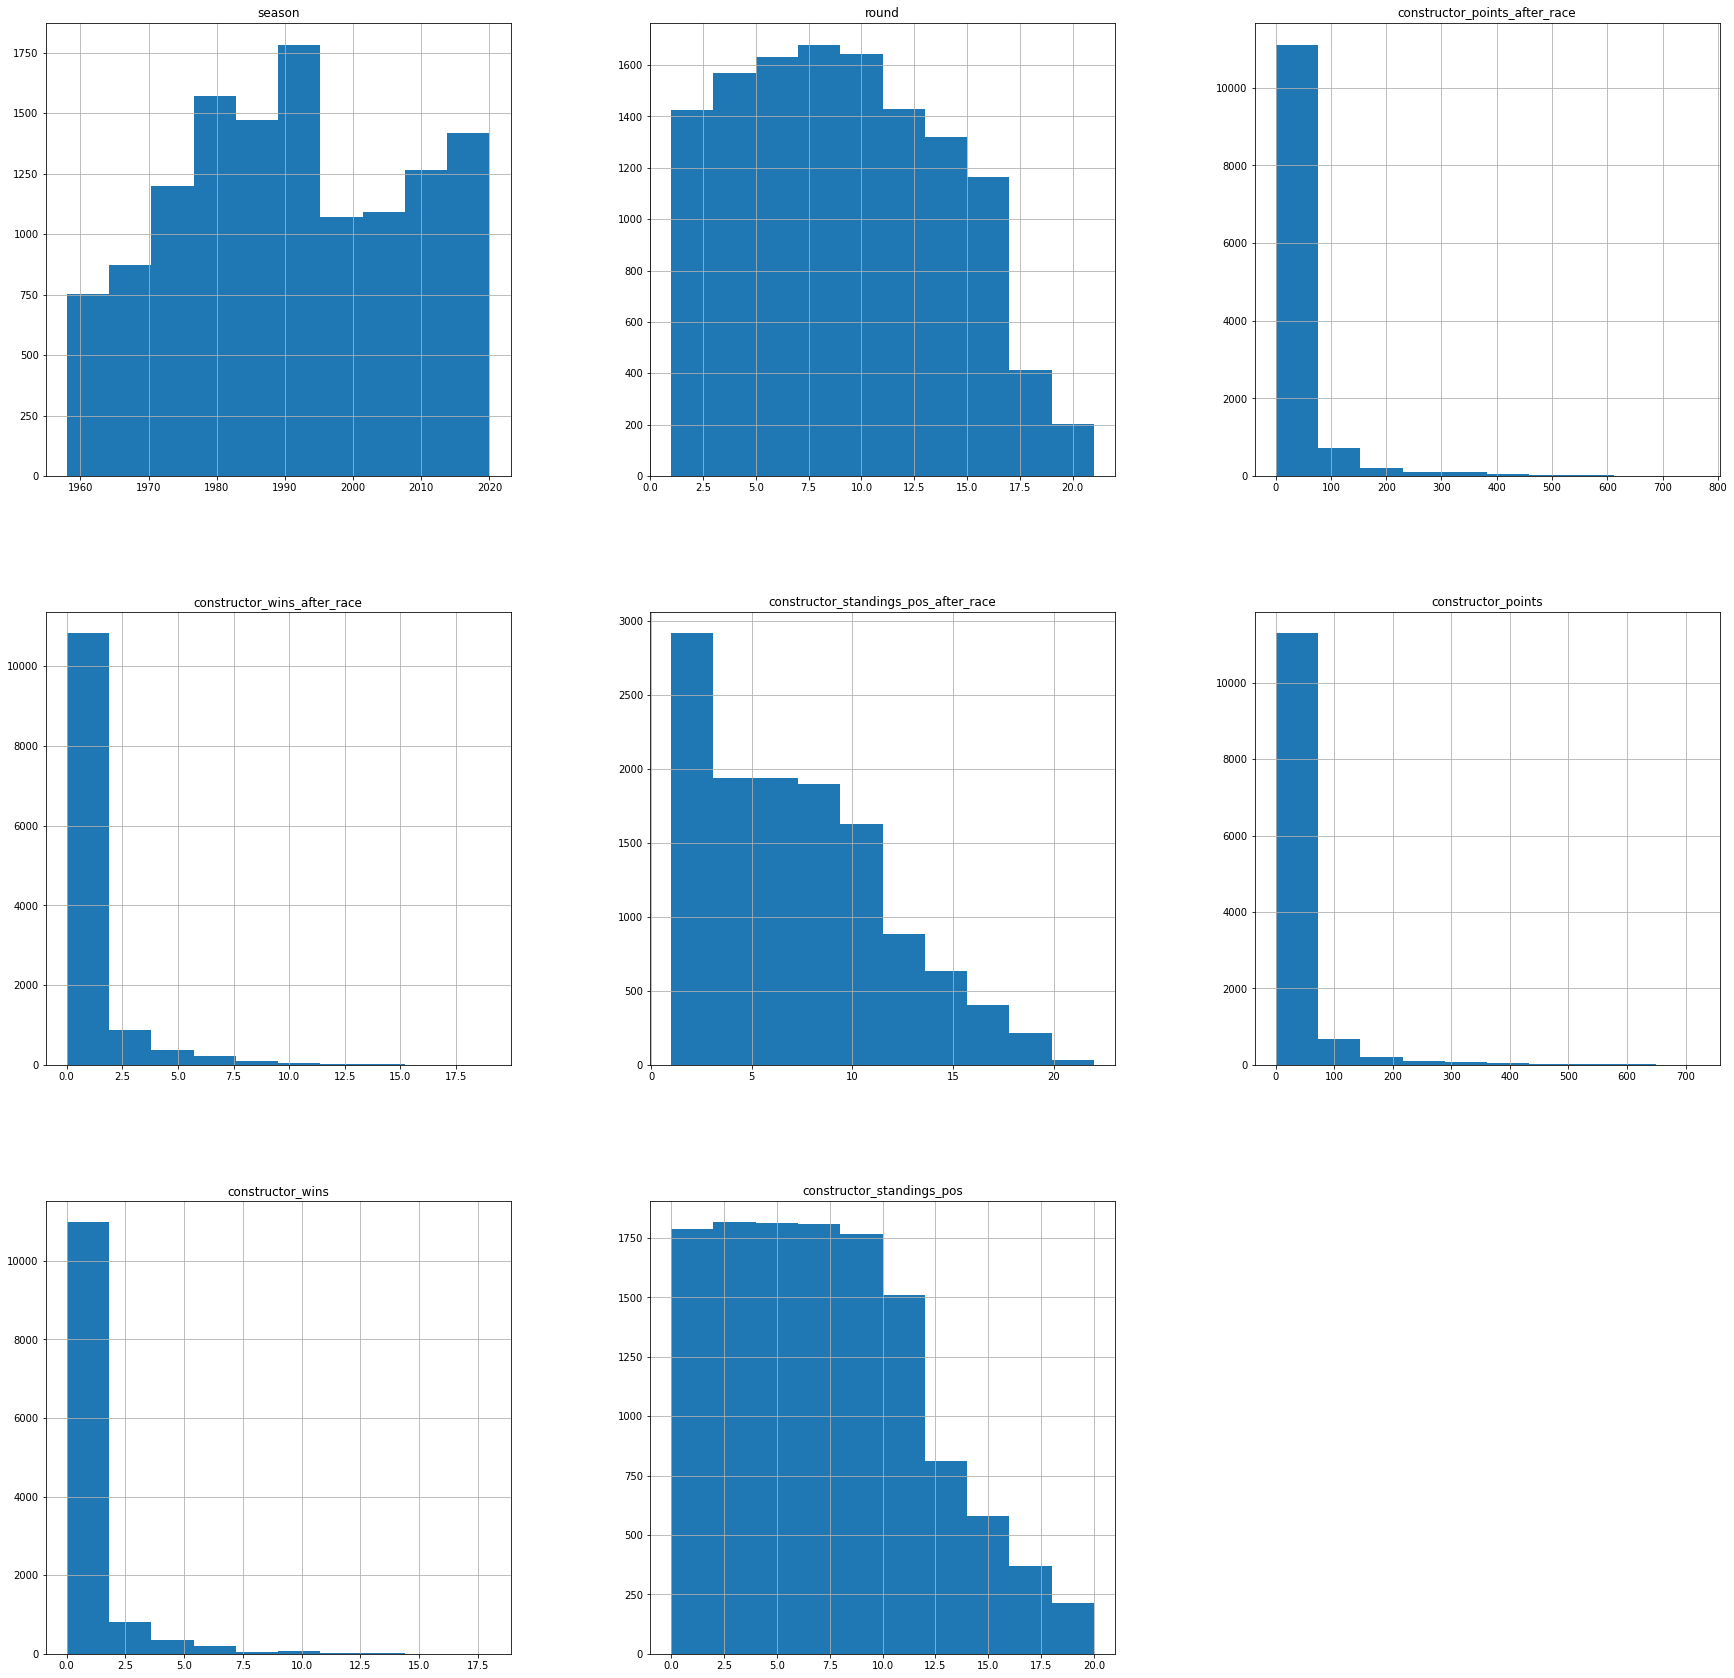

In [60]:
import matplotlib.pyplot as plt
#constructor_standings.boxplot()
fig = plt.figure(figsize=(30,30))
ax = fig.gca()
constructor_standings.hist(ax = ax)

## Feature-Feature Relationships
The final important relationship to explore is that of the relationships between the attributes.

We can review the relationships between attributes by looking at the distribution of the interactions of each pair of attributes.

array([[<AxesSubplot:xlabel='season', ylabel='season'>,
        <AxesSubplot:xlabel='round', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_points_after_race', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_wins_after_race', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_standings_pos_after_race', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_points', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_wins', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_standings_pos', ylabel='season'>],
       [<AxesSubplot:xlabel='season', ylabel='round'>,
        <AxesSubplot:xlabel='round', ylabel='round'>,
        <AxesSubplot:xlabel='constructor_points_after_race', ylabel='round'>,
        <AxesSubplot:xlabel='constructor_wins_after_race', ylabel='round'>,
        <AxesSubplot:xlabel='constructor_standings_pos_after_race', ylabel='round'>,
        <AxesSubplot:xlabel='constructor_points', ylabel='round'>,
        <AxesSubplot:x

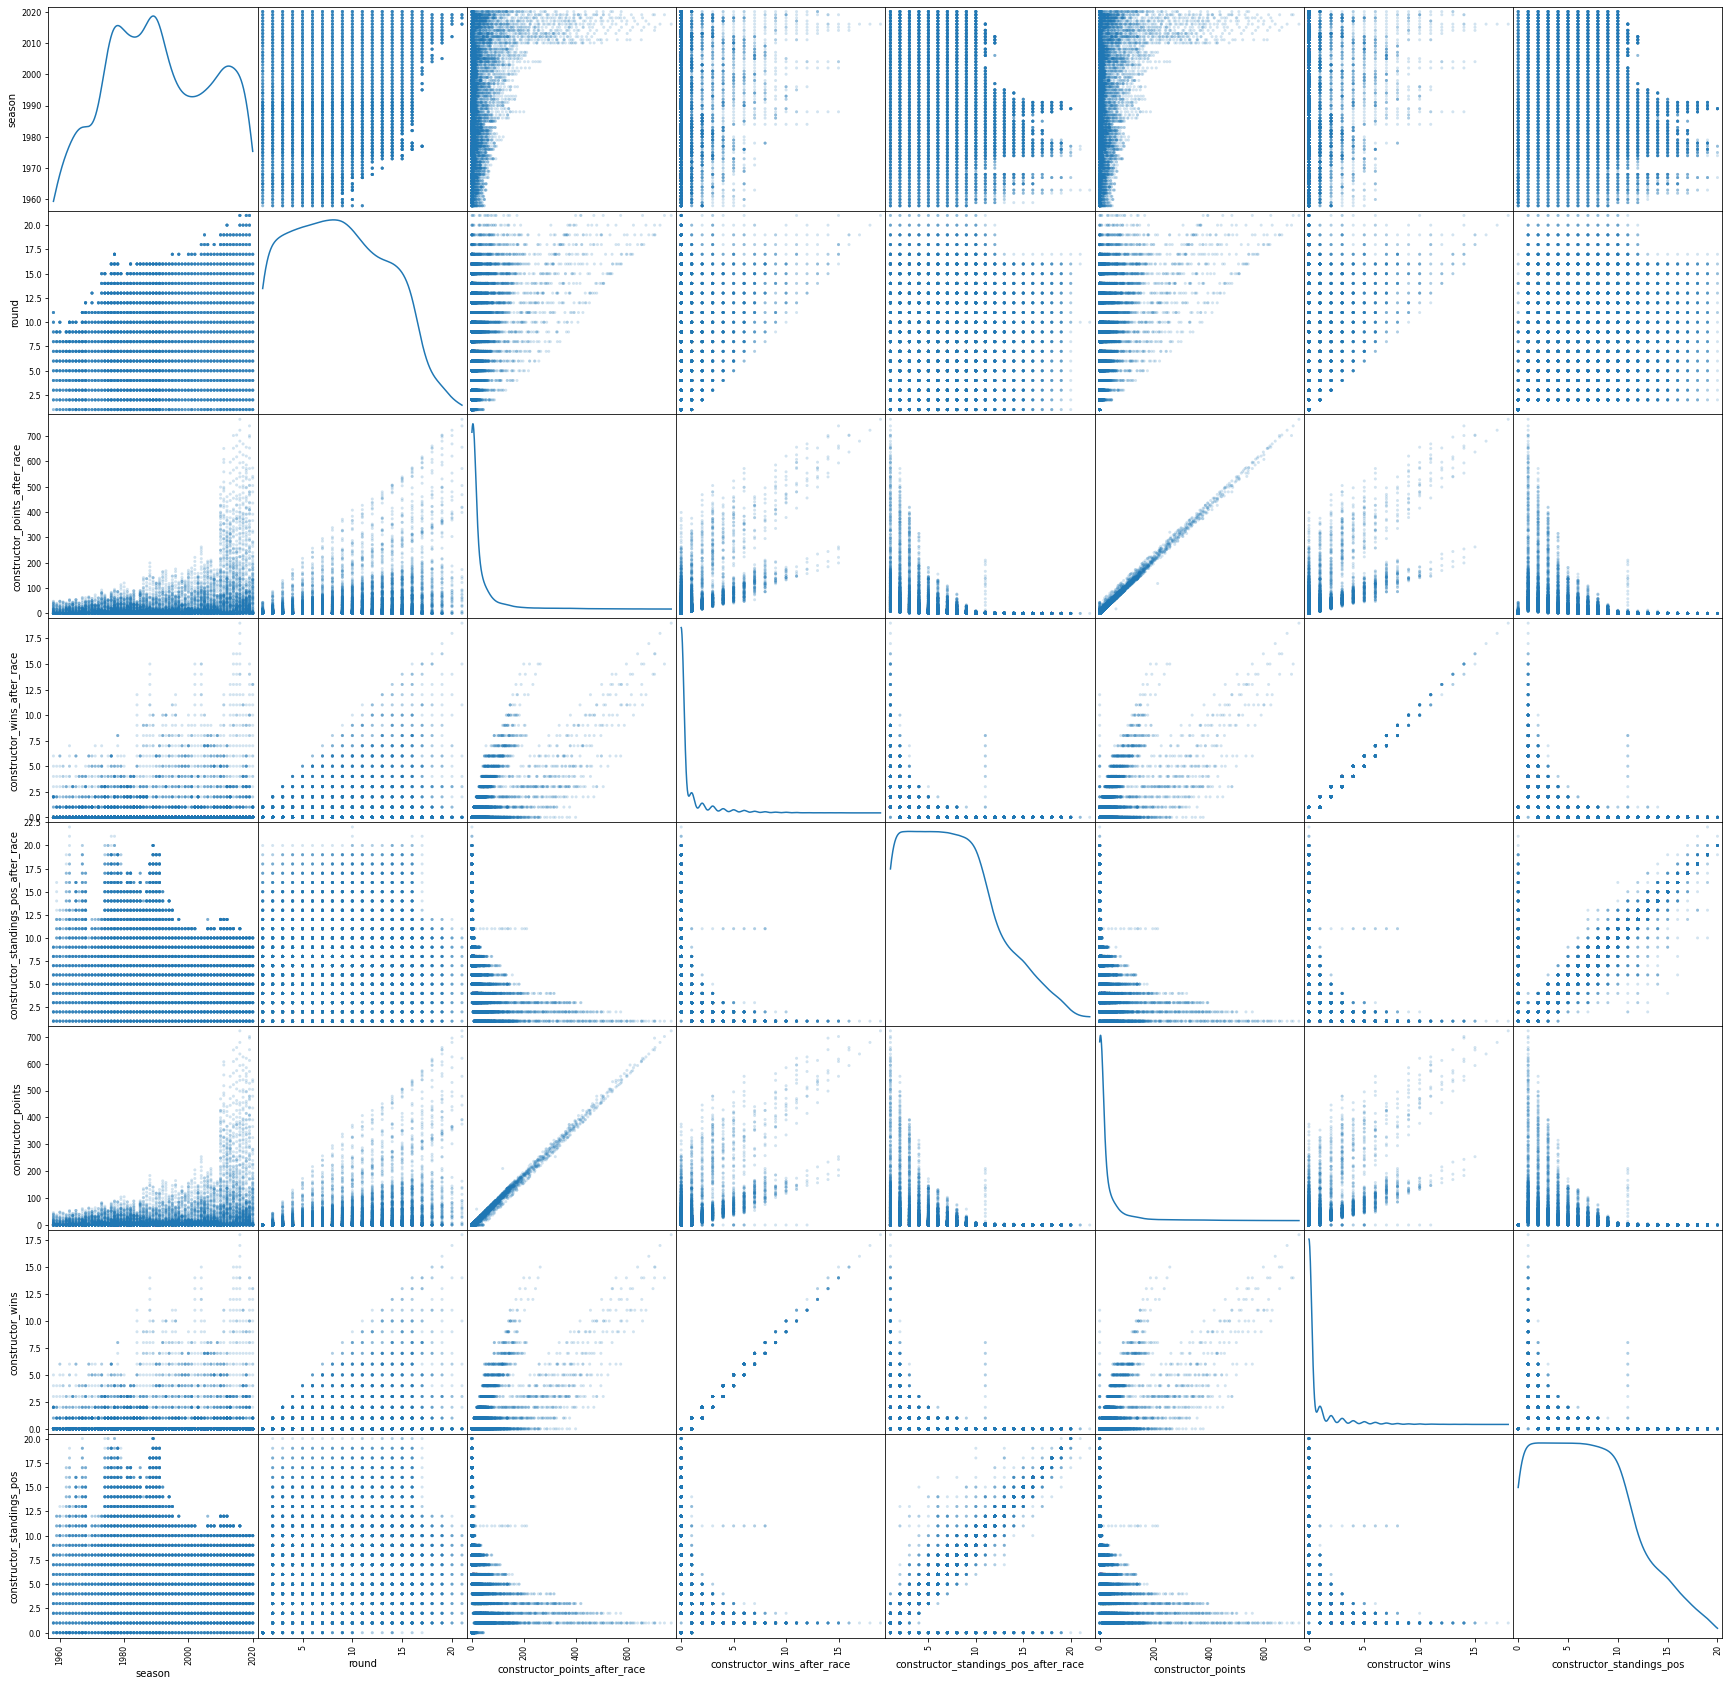

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(constructor_standings, alpha=0.2, figsize=(30, 30), diagonal='kde')

In [62]:
end = time.time()

In [63]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:00:28.260581'

In [64]:
print(str(end - start)+" seconds")

28.26058053970337 seconds
